<a href="https://colab.research.google.com/github/Linda-Agesa/Mchezopesa-Football-Analysis/blob/master/Mchezopesa_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Mchezopesa Football Analysis

## Context 

> Fifa World Ranking is a ranking system for men's national teams in association football. The teams of the men's member nations of FIFA, football's world governing body, are ranked based on their game results with the most successful teams being ranked highest. A point system is used, points being awarded based on the results of all FIFA recognized international matches.

## Problem Statement

>As a data analyst at Mchezo Ltd, the following task is required of you: Make a prediction of a game between team 1 and team 2 , based on who's home and who's away and on whether or not the game is friendly.
>### Result Prediction : Polynomial Approach 
>
>$ Model$ $1$ $:$ $Predict$ $how$ $many$ $goals$ $the$
$home$ $team$ $scores$
>
>$Model$ $2$ $:$ $Predict$ $how$ $many$ $goals$ $the$ $away$ $team$ $scores$
>
>
>### Classify Match Outcome : Logistic Approach
> Figure as out and classify from the home teams perspective if a game between two teams results in a win, loss or a draw.


## Research Design
>True Experimental Research Design
>This is the methodology we will to use for this research >experiment.
>
>A true experiment research design is a type of experimental design used to test and reject or fail to reject a hypothesis by using statistical analysis as the means of investigation. This type of experiment can also be used to determine cause and effect relationships within groups.
>
>The following are the assumptions that must be satisfied in
order to use the true experiment research design :
>
> - Control group and experimental group
> - Researcher - manipulated variable(s)
> - Random distribution

## Metrics for Success

> - An RMSE score that is less than 20% of the target mean
> - An accuracy score of 86% and above

## Project Plan

> This project was carried out using the following procession:
>
> 1. Understanding the context of the business and 
> 2. Definition of the problem statement .
> 3. Determining the metrics for evaluation.
> 4. Collection of data
> 5. Exploratory Data Analysis.
> 6. Data preparation and cleaning.
> 7. Implementing the solution:
> 8. Prediction
> 9. Evaluation of the solution
> 11. Challenging the solution
> 12. Summary of findings
> 13. Conclusion

## Loading Our Libraries and Files

### Importing Our Libraries

In [0]:
# Lets load all the necessary libraries for our workflow.
#
# Analysis libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp

# Machine learning libraries

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error, f1_score, accuracy_score, confusion_matrix

# Other libraries
import datetime as dt


### Importing Files

In [0]:
# Loading the files to our environment
#
fifa_ranks = pd.read_csv('fifa_ranking.csv')

match_results = pd.read_csv('results.csv')

## Data Cleaning

In [168]:
# Displaying the first five records of the ranking dataset

fifa_ranks.head()

,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date
0,1,Germany,GER,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
1,2,Italy,ITA,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
2,3,Switzerland,SUI,0.0,50,9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
3,4,Sweden,SWE,0.0,55,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
4,5,Argentina,ARG,0.0,51,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08


In [169]:
# Displaying the last 5 records of the ranking dataset
#
fifa_ranks.tail()

,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date
57788,206,Anguilla,AIA,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONCACAF,2018-06-07
57789,206,Bahamas,BAH,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONCACAF,2018-06-07
57790,206,Eritrea,ERI,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CAF,2018-06-07
57791,206,Somalia,SOM,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CAF,2018-06-07
57792,206,Tonga,TGA,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,OFC,2018-06-07


In [170]:
# Exhibiting the first few rows of the results dataset

match_results.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False


In [171]:
# Lets display the last few rows of the results dataset

match_results.tail()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
40834,2019-07-18,American Samoa,Tahiti,8,1,Pacific Games,Apia,Samoa,True
40835,2019-07-18,Fiji,Solomon Islands,4,4,Pacific Games,Apia,Samoa,True
40836,2019-07-19,Senegal,Algeria,0,1,African Cup of Nations,Cairo,Egypt,True
40837,2019-07-19,Tajikistan,North Korea,0,1,Intercontinental Cup,Ahmedabad,India,True
40838,2019-07-20,Papua New Guinea,Fiji,1,1,Pacific Games,Apia,Samoa,True


In [172]:
# Lets check the shapes of our datasets and display the results

print('Shape of Ranking Dataset :', 'The ranking dataset has ', fifa_ranks.shape[0],' rows and ', fifa_ranks.shape[1],' columns')
print('Shape of Results Dataset :', 'The results dataset has ', match_results.shape[0], ' rows and ', match_results.shape[1], ' columns')

Shape of Ranking Dataset : The ranking dataset has  57793  rows and  16  columns
Shape of Results Dataset : The results dataset has  40839  rows and  9  columns


#### Checking and dealing with duplicate records in the datasets



In [173]:
# The following line of code will show us if there are any duplicate records in our datasets
#
print('Ranking data duplicates : ', fifa_ranks.duplicated().any())
print('Results data duplicates : ', match_results.duplicated().any())

Ranking data duplicates :  True
Results data duplicates :  False




*   The FIFA ranking data contains duplicate rows.


In [0]:
# We will now drop the duplicate rows from our ranking data except for the first occurrence

fifa_ranked = fifa_ranks.drop_duplicates(keep = 'first')

In [175]:
# Now we check for the number of rows that have been dropped
#
print('Fifa Ranking Data : ', fifa_ranks.shape[0] - fifa_ranked.shape[0] , 'rows have been dropped')

Fifa Ranking Data :  37 rows have been dropped


#### Checking for Null Values

In [176]:
# Lets check for null values in the ranking dataset

fifa_ranked.isnull().sum()

rank                       0
country_full               0
country_abrv               0
total_points               0
previous_points            0
rank_change                0
cur_year_avg               0
cur_year_avg_weighted      0
last_year_avg              0
last_year_avg_weighted     0
two_year_ago_avg           0
two_year_ago_weighted      0
three_year_ago_avg         0
three_year_ago_weighted    0
confederation              0
rank_date                  0
dtype: int64

- The ranking dataset has no missing values

In [177]:
# Checking for null values in the results dataset

match_results.isnull().sum()

date          0
home_team     0
away_team     0
home_score    0
away_score    0
tournament    0
city          0
country       0
neutral       0
dtype: int64

- The match results dataset has no missing values either.

#### Checking the cardinality of columns

> We check for the cardinality of columns in the dataset to determine some of the columns that we might have to drop before we give feed variables into the model for training. Variables with high cardinality will not be part of the training data because it doesn't hold any new information to help train the model. We also drop variables with very low cardinality as they have very low to no variance between records hence does not help to train our models either.




In [178]:
# We will use a for loop to iterate through the columns 
# while checking for the number of unique values in each column.
#
# Number of unique values in the fifa ranking dataset

print('Cardinality of ranking dataset columns:\n')

for i in fifa_ranked.columns:
  print(f'{i:<23} : {fifa_ranked[i].nunique()}')
  
# Number of unique values of the columns in the match results dataset
#

print('\nCardinatity of the match results dataset columns:\n')
for j in match_results.columns:
  print(f'{j :<10} : {match_results[j].nunique()}')
   

Cardinality of ranking dataset columns:

rank                    : 209
country_full            : 216
country_abrv            : 216
total_points            : 11114
previous_points         : 1557
rank_change             : 121
cur_year_avg            : 7419
cur_year_avg_weighted   : 7419
last_year_avg           : 7473
last_year_avg_weighted  : 7001
two_year_ago_avg        : 7575
two_year_ago_weighted   : 6513
three_year_ago_avg      : 7628
three_year_ago_weighted : 5849
confederation           : 6
rank_date               : 286

Cardinatity of the match results dataset columns:

date       : 15115
home_team  : 309
away_team  : 306
home_score : 26
away_score : 22
tournament : 109
city       : 1960
country    : 266
neutral    : 2


- From the ranking dataset, the confederation column has low cardinality and from the match results dataset, the neutral column has a low cardinality as well. We will then proceed to check the column datatypes bfore we decide whether or not we will drop these columns.

#### Obtaining more information on our datasets

In [179]:
# First we check for the datatypes of the ranking data columns
#

print('Datatypes of FIFA ranking data columns:\n\n', fifa_ranked.dtypes)

# Checking the datatypes of the match results data columns
#
print('\nDatatypes of results data columns: \n\n', match_results.dtypes)


Datatypes of FIFA ranking data columns:

 rank                         int64
country_full                object
country_abrv                object
total_points               float64
previous_points              int64
rank_change                  int64
cur_year_avg               float64
cur_year_avg_weighted      float64
last_year_avg              float64
last_year_avg_weighted     float64
two_year_ago_avg           float64
two_year_ago_weighted      float64
three_year_ago_avg         float64
three_year_ago_weighted    float64
confederation               object
rank_date                   object
dtype: object

Datatypes of results data columns: 

 date          object
home_team     object
away_team     object
home_score     int64
away_score     int64
tournament    object
city          object
country       object
neutral         bool
dtype: object


- In both dataframes, the date columns have to be converted from the object format to datetime datatype before working on these columns.

- The neutral column has a boolean datatype and the confederation column is an object column hence we can still work with these columns despite them having low cardinality.

In [180]:
fifa_ranks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57793 entries, 0 to 57792
Data columns (total 16 columns):
rank                       57793 non-null int64
country_full               57793 non-null object
country_abrv               57793 non-null object
total_points               57793 non-null float64
previous_points            57793 non-null int64
rank_change                57793 non-null int64
cur_year_avg               57793 non-null float64
cur_year_avg_weighted      57793 non-null float64
last_year_avg              57793 non-null float64
last_year_avg_weighted     57793 non-null float64
two_year_ago_avg           57793 non-null float64
two_year_ago_weighted      57793 non-null float64
three_year_ago_avg         57793 non-null float64
three_year_ago_weighted    57793 non-null float64
confederation              57793 non-null object
rank_date                  57793 non-null object
dtypes: float64(9), int64(3), object(4)
memory usage: 7.1+ MB


In [181]:
match_results.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40839 entries, 0 to 40838
Data columns (total 9 columns):
date          40839 non-null object
home_team     40839 non-null object
away_team     40839 non-null object
home_score    40839 non-null int64
away_score    40839 non-null int64
tournament    40839 non-null object
city          40839 non-null object
country       40839 non-null object
neutral       40839 non-null bool
dtypes: bool(1), int64(2), object(6)
memory usage: 2.5+ MB


#### Converting the date columns to datetime datatype

In [182]:
# Creating a datetime object on the rank_date column in the ranking dataset and the date column in the results dataset
#

fifa_ranked.rank_date = pd.to_datetime(fifa_ranked.rank_date)
match_results.date = pd.to_datetime(match_results.date)

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:5096: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [183]:
# Now checking the dtypes to confirm that the datetime objects have been created \
#

print('Datatypes of FIFA ranking data columns:\n\n', fifa_ranked.dtypes)

# Checking the datatypes of the match results data columns
#
print('\nDatatypes of results data columns: \n\n', match_results.dtypes)


Datatypes of FIFA ranking data columns:

 rank                                int64
country_full                       object
country_abrv                       object
total_points                      float64
previous_points                     int64
rank_change                         int64
cur_year_avg                      float64
cur_year_avg_weighted             float64
last_year_avg                     float64
last_year_avg_weighted            float64
two_year_ago_avg                  float64
two_year_ago_weighted             float64
three_year_ago_avg                float64
three_year_ago_weighted           float64
confederation                      object
rank_date                  datetime64[ns]
dtype: object

Datatypes of results data columns: 

 date          datetime64[ns]
home_team             object
away_team             object
home_score             int64
away_score             int64
tournament            object
city                  object
country               object
n

- Awesome! We have successfully changed the datatypes of the time columns to datetime.

In [184]:
# Now to create new columns and split the date colums into month and year.
#
# For the year columns

fifa_ranked['year'] = fifa_ranked.rank_date.dt.year
match_results['year'] = match_results.date.dt.year

# Now for the month columns

fifa_ranked['month'] = fifa_ranked.rank_date.dt.month
match_results['month'] = match_results.date.dt.month

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


In [185]:
# Viewing the ranking dataframe

fifa_ranked.head()

,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date,year,month
0,1,Germany,GER,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08,1993,8
1,2,Italy,ITA,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08,1993,8
2,3,Switzerland,SUI,0.0,50,9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08,1993,8
3,4,Sweden,SWE,0.0,55,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08,1993,8
4,5,Argentina,ARG,0.0,51,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08,1993,8


In [186]:
match_results.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,year,month
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False,1872,11
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False,1873,3
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False,1874,3
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False,1875,3
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False,1876,3


#### Dealing with columns
- Before we combine the two datasets, we need to make sure that the common columns have the same column names in both datasets.

In [187]:
match_results.columns

Index(['date', 'home_team', 'away_team', 'home_score', 'away_score',
       'tournament', 'city', 'country', 'neutral', 'year', 'month'],
      dtype='object')

In [188]:
fifa_ranked.columns

Index(['rank', 'country_full', 'country_abrv', 'total_points',
       'previous_points', 'rank_change', 'cur_year_avg',
       'cur_year_avg_weighted', 'last_year_avg', 'last_year_avg_weighted',
       'two_year_ago_avg', 'two_year_ago_weighted', 'three_year_ago_avg',
       'three_year_ago_weighted', 'confederation', 'rank_date', 'year',
       'month'],
      dtype='object')

In [189]:
fifa_ranked.head()

,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date,year,month
0,1,Germany,GER,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08,1993,8
1,2,Italy,ITA,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08,1993,8
2,3,Switzerland,SUI,0.0,50,9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08,1993,8
3,4,Sweden,SWE,0.0,55,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08,1993,8
4,5,Argentina,ARG,0.0,51,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08,1993,8


#### Data Integration

- We will now merge the two datasets to form our analysis dataset.
- We will use an inner merge/join as we want to keep only the rows exist on the columns common to both dataframes.

In [190]:
# We now merge the two datasets for form one that we will use for analysis

fifa_home = pd.merge(match_results, fifa_ranked,  left_on = ['home_team', 'year', 'month'], right_on = ['country_full', 'year', 'month'],  how = 'inner' )

fifa_home.shape
print('Our FIFA home dataset has ', fifa_home.shape[0], 'rows and ', fifa_home.shape[1], 'columns')

Our FIFA home dataset has  18593 rows and  27 columns


In [191]:
_# Merging the ranking dataset to the result dataset on the away_team, year and month columns

fifa_away = pd.merge(match_results, fifa_ranked, how = 'inner', left_on = ['year', 'month', 'away_team'], right_on = ['year', 'month', 'country_full'])

print('Our FIFA away dataset has ', fifa_away.shape[0], 'rows and ', fifa_away.shape[1], 'columns')

Our FIFA away dataset has  18502 rows and  27 columns


In [192]:
# Number of countries in the home dataset
#
fifa_home.country_abrv.nunique()

193

In [193]:
# Lets check the number of countries in the away dataset
#
fifa_away.country_abrv.nunique()

194

In [0]:
# Renaming the ranks columns to get the home team and away team ranks
#
fifa_home.rename({'rank' : 'home_rank'}, axis = 1, inplace = True)
fifa_away.rename({'rank' : 'away_rank'}, axis =1, inplace = True)

In [195]:
fifa_home.columns

Index(['date', 'home_team', 'away_team', 'home_score', 'away_score',
       'tournament', 'city', 'country', 'neutral', 'year', 'month',
       'home_rank', 'country_full', 'country_abrv', 'total_points',
       'previous_points', 'rank_change', 'cur_year_avg',
       'cur_year_avg_weighted', 'last_year_avg', 'last_year_avg_weighted',
       'two_year_ago_avg', 'two_year_ago_weighted', 'three_year_ago_avg',
       'three_year_ago_weighted', 'confederation', 'rank_date'],
      dtype='object')

In [196]:
fifa_away.columns

Index(['date', 'home_team', 'away_team', 'home_score', 'away_score',
       'tournament', 'city', 'country', 'neutral', 'year', 'month',
       'away_rank', 'country_full', 'country_abrv', 'total_points',
       'previous_points', 'rank_change', 'cur_year_avg',
       'cur_year_avg_weighted', 'last_year_avg', 'last_year_avg_weighted',
       'two_year_ago_avg', 'two_year_ago_weighted', 'three_year_ago_avg',
       'three_year_ago_weighted', 'confederation', 'rank_date'],
      dtype='object')

In [197]:
away_ranks = fifa_away[['away_team','away_rank','year','month']]
away_ranks.head()

#away_ranks.shape

,away_team,away_rank,year,month
0,Paraguay,67,1993,8
1,Paraguay,67,1993,8
2,Argentina,5,1993,8
3,Argentina,5,1993,8
4,Argentina,5,1993,8


In [198]:
fifa_df = pd.merge(fifa_home, away_ranks, how = 'inner', left_on = ['year', 'month', 'away_team'], right_on = ['year', 'month', 'away_team'])

fifa_df.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,year,month,home_rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date,away_rank
0,1993-08-01,Colombia,Paraguay,0,0,FIFA World Cup qualification,Barranquilla,Colombia,False,1993,8,19,Colombia,COL,0.0,36,16,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08,67
1,1993-08-01,Colombia,Paraguay,0,0,FIFA World Cup qualification,Barranquilla,Colombia,False,1993,8,19,Colombia,COL,0.0,36,16,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08,67
2,1993-08-29,Argentina,Paraguay,0,0,FIFA World Cup qualification,Buenos Aires,Argentina,False,1993,8,5,Argentina,ARG,0.0,51,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08,67
3,1993-08-29,Argentina,Paraguay,0,0,FIFA World Cup qualification,Buenos Aires,Argentina,False,1993,8,5,Argentina,ARG,0.0,51,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08,67
4,1993-08-15,Colombia,Argentina,2,1,FIFA World Cup qualification,Barranquilla,Colombia,False,1993,8,19,Colombia,COL,0.0,36,16,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08,5


In [199]:
print(fifa_df.shape, '\n')
print('Presence of duplicated records: ', fifa_df.duplicated().any(), '\n')
print('Number of duplicate records: ', fifa_df.duplicated().sum())

(28439, 28) 

Presence of duplicated records:  True 

Number of duplicate records:  11535


In [200]:
# viewing the duplicate rows

a = fifa_df.duplicated()
fifa_df[a].head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,year,month,home_rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date,away_rank
1,1993-08-01,Colombia,Paraguay,0,0,FIFA World Cup qualification,Barranquilla,Colombia,False,1993,8,19,Colombia,COL,0.0,36,16,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08,67
3,1993-08-29,Argentina,Paraguay,0,0,FIFA World Cup qualification,Buenos Aires,Argentina,False,1993,8,5,Argentina,ARG,0.0,51,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08,67
5,1993-08-15,Colombia,Argentina,2,1,FIFA World Cup qualification,Barranquilla,Colombia,False,1993,8,19,Colombia,COL,0.0,36,16,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08,5
6,1993-08-15,Colombia,Argentina,2,1,FIFA World Cup qualification,Barranquilla,Colombia,False,1993,8,19,Colombia,COL,0.0,36,16,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08,5
8,1993-08-01,Peru,Argentina,0,1,FIFA World Cup qualification,Lima,Peru,False,1993,8,70,Peru,PER,0.0,16,8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08,5


In [201]:
fifa_df.shape

(28439, 28)

In [0]:
# Dropping duplicate rows from the dataset
#
fifa_df.drop_duplicates(keep = 'first', inplace = True)

In [0]:
# Resettinfg the index column after dropping duplicate values
fifa_df.reset_index(drop = True, inplace = True)

In [204]:
fifa_df.tail()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,year,month,home_rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date,away_rank
16899,2018-06-18,Tunisia,England,1,2,FIFA World Cup,Volgograd,Russia,True,2018,6,21,Tunisia,TUN,909.91,1012,-7,545.56,545.56,394.79,197.39,227.59,68.28,493.39,98.68,CAF,2018-06-07,12
16900,2018-06-12,Japan,Paraguay,4,2,Friendly,Innsbruck,Austria,True,2018,6,61,Japan,JPN,520.75,528,-1,164.51,164.51,413.01,206.50,273.24,81.97,338.88,67.78,AFC,2018-06-07,32
16901,2018-06-28,Japan,Poland,0,1,FIFA World Cup,Volgograd,Russia,True,2018,6,61,Japan,JPN,520.75,528,-1,164.51,164.51,413.01,206.50,273.24,81.97,338.88,67.78,AFC,2018-06-07,8
16902,2018-06-16,Argentina,Iceland,1,1,FIFA World Cup,Moscow,Russia,True,2018,6,5,Argentina,ARG,1241.45,1254,0,404.07,404.07,809.59,404.80,829.98,248.99,917.94,183.59,CONMEBOL,2018-06-07,22
16903,2018-06-22,Nigeria,Iceland,2,0,FIFA World Cup,Volgograd,Russia,True,2018,6,48,Nigeria,NGA,617.79,635,-1,251.21,251.21,474.22,237.11,198.21,59.46,350.01,70.00,CAF,2018-06-07,22


In [205]:
fifa_df.isnull().sum()

date                       0
home_team                  0
away_team                  0
home_score                 0
away_score                 0
tournament                 0
city                       0
country                    0
neutral                    0
year                       0
month                      0
home_rank                  0
country_full               0
country_abrv               0
total_points               0
previous_points            0
rank_change                0
cur_year_avg               0
cur_year_avg_weighted      0
last_year_avg              0
last_year_avg_weighted     0
two_year_ago_avg           0
two_year_ago_weighted      0
three_year_ago_avg         0
three_year_ago_weighted    0
confederation              0
rank_date                  0
away_rank                  0
dtype: int64

In [0]:
fifa_df.to_csv('fifa_dataset.csv')

In [0]:
# Lets change the non-numerical datatypes into categorical data 
#

#columns = ['confederation', 'year', 'month', 'home_team', 'away_team', 'tournament', 'city', 'neutral' ]

#fifa_df[columns] = fifa_df[columns].astype('category')
#fifa_df.dtypes


In [207]:
fifa_df.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,year,month,home_rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date,away_rank
0,1993-08-01,Colombia,Paraguay,0,0,FIFA World Cup qualification,Barranquilla,Colombia,False,1993,8,19,Colombia,COL,0.0,36,16,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08,67
1,1993-08-29,Argentina,Paraguay,0,0,FIFA World Cup qualification,Buenos Aires,Argentina,False,1993,8,5,Argentina,ARG,0.0,51,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08,67
2,1993-08-15,Colombia,Argentina,2,1,FIFA World Cup qualification,Barranquilla,Colombia,False,1993,8,19,Colombia,COL,0.0,36,16,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08,5
3,1993-08-01,Peru,Argentina,0,1,FIFA World Cup qualification,Lima,Peru,False,1993,8,70,Peru,PER,0.0,16,8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08,5
4,1993-08-08,Paraguay,Argentina,1,3,FIFA World Cup qualification,Asunción,Paraguay,False,1993,8,67,Paraguay,PAR,0.0,22,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08,5


## Exploratory Data Analysis (EDA)

### Univariate Analysis

#### Non-Grahical Univariate EDA

In [208]:
fifa_df.describe()

,home_score,away_score,year,month,home_rank,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,away_rank
count,16904.000000,16904.000000,16904.000000,16904.000000,16904.000000,16904.000000,16904.000000,16904.000000,16904.000000,16904.000000,16904.000000,16904.000000,16904.000000,16904.000000,16904.000000,16904.000000,16904.000000
mean,1.603999,1.068268,2006.490771,6.877307,76.056377,165.794733,435.065783,0.936583,83.987919,83.987919,82.906679,41.453431,79.703732,23.911149,82.212241,16.442486,78.918836
std,1.615409,1.245122,6.803461,3.273882,50.833721,313.589797,319.215750,6.851801,164.722951,164.722951,167.037324,83.518712,160.712955,48.213890,165.609782,33.121970,52.027710
min,0.000000,0.000000,1993.000000,1.000000,1.000000,0.000000,0.000000,-62.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,2001.000000,4.000000,33.000000,0.000000,174.000000,-2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,35.000000
50%,1.000000,1.000000,2007.000000,7.000000,70.000000,0.000000,417.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,72.000000
75%,2.000000,2.000000,2012.000000,10.000000,112.000000,230.425000,617.000000,3.000000,102.422500,102.422500,94.290000,47.140000,85.872500,25.762500,88.435000,17.687500,115.000000
max,31.000000,15.000000,2018.000000,12.000000,209.000000,1770.060000,1887.000000,73.000000,1158.660000,1158.660000,1169.570000,584.790000,1153.120000,345.940000,1200.770000,240.150000,209.000000


In [209]:
fifa_df.columns

Index(['date', 'home_team', 'away_team', 'home_score', 'away_score',
       'tournament', 'city', 'country', 'neutral', 'year', 'month',
       'home_rank', 'country_full', 'country_abrv', 'total_points',
       'previous_points', 'rank_change', 'cur_year_avg',
       'cur_year_avg_weighted', 'last_year_avg', 'last_year_avg_weighted',
       'two_year_ago_avg', 'two_year_ago_weighted', 'three_year_ago_avg',
       'three_year_ago_weighted', 'confederation', 'rank_date', 'away_rank'],
      dtype='object')

#### Graphical Univariate EDA

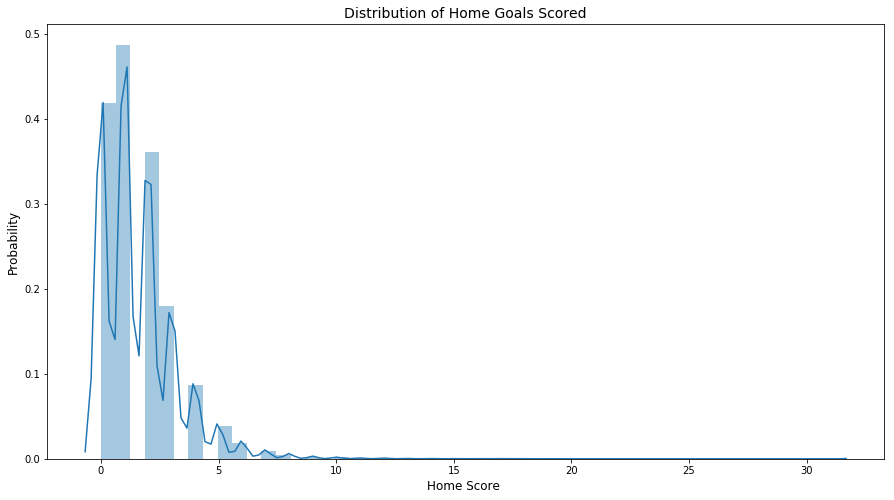

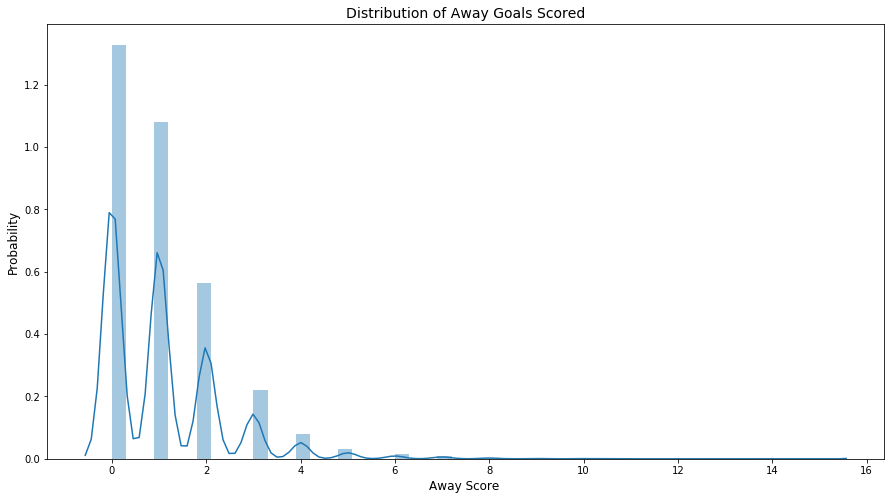

In [210]:
# Using the seaborn library to plot a histogram 
#

plt.subplots(figsize =  (15,8))
sns.distplot(fifa_df.home_score,hist = True, norm_hist = True, bins = None)


plt.xlabel('Home Score ', color = 'black', fontsize =12)
plt.ylabel('Probability', color ='black', fontsize = 12)
plt.title('Distribution of Home Goals Scored', color = 'black', fontsize = 14)
plt.show()
print('\n')


plt.subplots(figsize =  (15,8))
sns.distplot(fifa_df.away_score,hist = True,  bins = None)


plt.xlabel('Away Score ', color = 'black', fontsize =12)
plt.ylabel('Probability', color ='black', fontsize = 12)
plt.title('Distribution of Away Goals Scored', color = 'black', fontsize = 14)
plt.show()

In [214]:
fifa_df.dtypes

date                       datetime64[ns]
home_team                          object
away_team                          object
home_score                          int64
away_score                          int64
tournament                         object
city                               object
country                            object
neutral                              bool
year                                int64
month                               int64
home_rank                           int64
country_full                       object
country_abrv                       object
total_points                      float64
previous_points                     int64
rank_change                         int64
cur_year_avg                      float64
cur_year_avg_weighted             float64
last_year_avg                     float64
last_year_avg_weighted            float64
two_year_ago_avg                  float64
two_year_ago_weighted             float64
three_year_ago_avg                

#### Boxplots used to detect anomalies

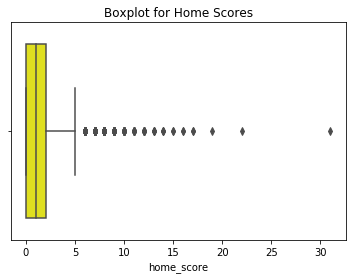

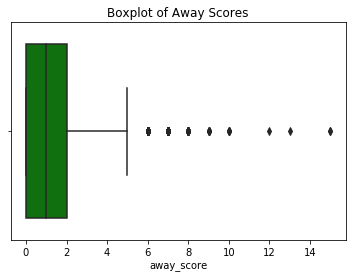

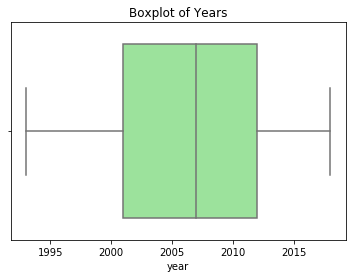

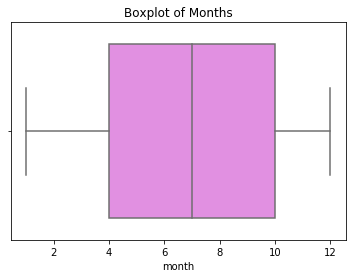

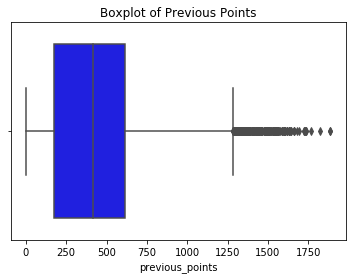

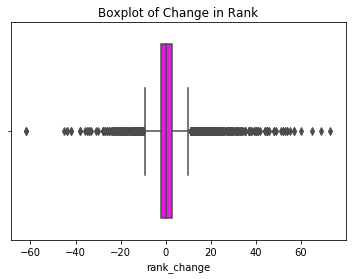

In [221]:
sns.boxplot(x = 'home_score', data = fifa_df, color = 'yellow')
plt.title('Boxplot for Home Scores')
plt.show()

sns.boxplot(x = 'away_score', data = fifa_df, color = 'green')
plt.title('Boxplot of Away Scores')
plt.show()

sns.boxplot(x = 'year', data = fifa_df, color = 'lightgreen')
plt.title('Boxplot of Years')
plt.show()

sns.boxplot(x = 'month', data = fifa_df, color = 'violet')
plt.title('Boxplot of Months')
plt.show()

sns.boxplot(x = 'previous_points', data = fifa_df, color = 'blue')
plt.title('Boxplot of Previous Points')
plt.show()

sns.boxplot(x = 'rank_change', data = fifa_df, color = 'magenta' )
plt.title('Boxplot of Change in Rank')
plt.show()



## Featuring

#### Creating Additional Columns 

In [0]:
# We will create a column that gives the difference in goals between the home team and the away team

fifa_df['goal_difference'] = fifa_df.home_score - fifa_df.away_score



In [0]:
# We will also create a column that classifies the match outcome as either a win, loss or a draw with regards to the home team

x = fifa_df.home_score - fifa_df.away_score

def match_outcome(x):
  if x > 0:
    return 'Win'
  elif x < 0:
    return 'Loss'
  else:
    return 'Draw'

# creating a new column to give the match oucome
fifa_df['match_outcome'] = fifa_df.goal_difference.apply(lambda x: match_outcome(x))

In [0]:
# Creating a new column to give the type of tournament

def tourn_type(i):
  if i == 'FIFA World Cup':
    return 'FIFA World Cup'
  if i == 'Friendly':
    return 'Friendly'
  else:
    return 'Other'

fifa_df['tournament_type'] = fifa_df.tournament.apply(lambda x: tourn_type(x))

In [0]:
#[col for col in fifa_df.columns if col not in

#### Dropping Unnecessary Columns

In [0]:
# Dropping the categorical data that we will not need to fit into the training data
#

mycols =  ['date','rank_date','tournament', 'city', 'country','country_full', 'country_abrv', 'home_team','away_team', 'confederation']
fifa_df.drop(mycols, axis = 1, inplace = True)

In [103]:
fifa_df.columns

Index(['home_score', 'away_score', 'neutral', 'year', 'month', 'home_rank',
       'total_points', 'previous_points', 'rank_change', 'cur_year_avg',
       'cur_year_avg_weighted', 'last_year_avg', 'last_year_avg_weighted',
       'two_year_ago_avg', 'two_year_ago_weighted', 'three_year_ago_avg',
       'three_year_ago_weighted', 'away_rank', 'goal_difference',
       'match_outcome', 'tournament_type'],
      dtype='object')

In [104]:
fifa_df.dtypes

home_score                   int64
away_score                   int64
neutral                       bool
year                         int64
month                        int64
home_rank                    int64
total_points               float64
previous_points              int64
rank_change                  int64
cur_year_avg               float64
cur_year_avg_weighted      float64
last_year_avg              float64
last_year_avg_weighted     float64
two_year_ago_avg           float64
two_year_ago_weighted      float64
three_year_ago_avg         float64
three_year_ago_weighted    float64
away_rank                    int64
goal_difference              int64
match_outcome               object
tournament_type             object
dtype: object

#### Label Encoding Categorical Data

In [105]:
# Categorical boolean mask
#

#categorical_feature_mask = fifa_df.dtypes==object 

# filter categorical columns using mask and turn it into a list

categorical_cols = ['neutral', 'tournament_type', 'match_outcome']

le = LabelEncoder()

# apply label encoder on categorical feature columns

fifa_df[categorical_cols] = fifa_df[categorical_cols].apply(lambda x: le.fit_transform(x))

fifa_df[categorical_cols].head(10)

,neutral,tournament_type,match_outcome
0,0,2,0
1,0,2,0
2,0,2,2
3,0,2,1
4,0,2,1
5,0,2,2
6,0,2,2
7,0,2,2
8,0,2,1
9,0,2,0


#### Checking for Multicollinearity

In [106]:
# Finding the correlation between variables
#

fifa_corr = fifa_df.corr()
fifa_corr

,home_score,away_score,neutral,year,month,home_rank,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,away_rank,goal_difference,match_outcome,tournament_type
home_score,1.000000,-0.163449,-0.041618,-0.038735,0.018577,-0.135751,0.029473,0.086176,0.084176,0.027615,0.027615,0.024966,0.024966,0.031087,0.031087,0.033499,0.033498,0.318369,0.828721,0.519045,0.057697
away_score,-0.163449,1.000000,0.100754,-0.007922,0.018034,0.221458,-0.060140,-0.130546,-0.088782,-0.061239,-0.061239,-0.048945,-0.048945,-0.057669,-0.057670,-0.057475,-0.057474,-0.180101,-0.687589,-0.241272,0.023292
neutral,-0.041618,0.100754,1.000000,0.043224,-0.104829,0.037188,0.036269,-0.002373,0.018831,0.033139,0.033139,0.043398,0.043398,0.023244,0.023244,0.035310,0.035310,0.047499,-0.087788,-0.045104,0.035227
year,-0.038735,-0.007922,0.043224,1.000000,-0.001626,0.104435,0.620286,0.390617,-0.060667,0.597813,0.597813,0.584345,0.584346,0.581816,0.581817,0.579277,0.579278,0.105708,-0.024015,-0.018410,-0.033767
month,0.018577,0.018034,-0.104829,-0.001626,1.000000,0.028463,0.036846,-0.042312,0.035996,0.037558,0.037558,0.030348,0.030347,0.037827,0.037827,0.030474,0.030476,0.029525,0.003442,0.011726,0.131349
home_rank,-0.135751,0.221458,0.037188,0.104435,0.028463,1.000000,-0.289844,-0.663048,-0.000397,-0.286403,-0.286403,-0.270734,-0.270734,-0.262399,-0.262398,-0.255192,-0.255191,0.469454,-0.225543,-0.116157,0.134645
total_points,0.029473,-0.060140,0.036269,0.620286,0.036846,-0.289844,1.000000,0.525354,-0.043909,0.974909,0.974909,0.936991,0.936992,0.921001,0.921001,0.915973,0.915973,-0.121127,0.055809,0.030572,-0.065102
previous_points,0.086176,-0.130546,-0.002373,0.390617,-0.042312,-0.663048,0.525354,1.000000,-0.112908,0.512132,0.512132,0.497654,0.497653,0.479277,0.479277,0.474445,0.474445,-0.292109,0.137483,0.067821,-0.103915
rank_change,0.084176,-0.088782,0.018831,-0.060667,0.035996,-0.000397,-0.043909,-0.112908,1.000000,-0.014753,-0.014753,-0.075322,-0.075323,-0.061949,-0.061949,-0.062243,-0.062243,0.044661,0.112319,0.101541,0.083308
cur_year_avg,0.027615,-0.061239,0.033139,0.597813,0.037558,-0.286403,0.974909,0.512132,-0.014753,1.000000,1.000000,0.854383,0.854384,0.859211,0.859212,0.851877,0.851878,-0.118324,0.055065,0.032489,-0.056082


In [0]:
# Using VIF to check for multicollinearity

#vif_df = pd.DataFrame(np.linalg.inv(fifa_corr.values), index = fifa_corr.index, columns = fifa_corr.columns)


In [0]:
#sns.set_style('dark')
#plt.subplots(figsize =  (15,8))
#sns.heatmap(vif_df, annot = True)
#plt.title('VIF Heatmap', color = 'black', fontsize = 20)

#plt.show()

## Implementing the Solution

## First Approach:

 Model 1 : Predicting the home team score

 Model 2 : Predicting the away team score

### Model 1 : Predicting the Home Score

#### Slitting train and test sets

In [0]:
mycols = [col for col in fifa_df.columns if col not in ['home_score', 'away_score', 'date','rank_date','tournament', 'city', 'country', 
                                                        'country_full', 'country_abrv', 'home_team',
                                                        'away_team']]

x = fifa_df[mycols]

y = fifa_df['home_score']

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = 13, test_size = 0.3)

#### Normalization

In [0]:
# Normalizing our data before running it through the model
#

sc = StandardScaler()

x_train = sc.fit_transform(x_train)

x_test = sc.transform(x_test)
  

#### Feature Reduction using PCA

In [0]:
# Applying PCA
  
pca = PCA()
  
x_train = pca.fit_transform(x_train)
  
x_test = pca.transform(x_test)


In [0]:
# We now apply the number of components we desire to the PCA() function for reduction

pca = PCA(n_components = 19)
x_train = pca.fit_transform(x_train)
x_test = pca.transform(x_test)

#### Fitting the model

In [112]:
# Fitting the polynomial linear regression

poly_features = PolynomialFeatures(include_bias = False, degree = 1)

x_train = poly_features.fit_transform(x_train)
x_test = poly_features.fit_transform(x_test)

# Training the model

linreg = LinearRegression()
linreg.fit(x_train, y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

#### Interpretting coefficients
> The coefficient of the variables allow us to model our equation with these particular values for our betas. We are able to extract the intercepts and coefficients using the linear regression variable. 

In [113]:
# Prints y-intercept
print(linreg.intercept_)

# Prints the beta coefficients in order
print(linreg.coef_)

feature_columns =['neutral', 'year', 'month', 'home_rank',
       'total_points', 'previous_points', 'rank_change', 'cur_year_avg',
       'cur_year_avg_weighted', 'last_year_avg', 'last_year_avg_weighted',
       'two_year_ago_avg', 'two_year_ago_weighted', 'three_year_ago_avg',
       'three_year_ago_weighted', 'away_rank', 'goal_difference',
       'match_outcome', 'tournament_type']
# Zip can pair feature names as coefficients together
zip(feature_columns, linreg.coef_)

1.614604462474645
[ 1.58274434e-02  7.26940867e-01  5.89235085e-01 -1.50662389e-01
 -9.45711721e-02 -1.28895048e-01  8.86367418e-02 -6.82285014e-02
  3.78223062e-01  6.88562526e-01  4.92454251e-02 -2.10740350e-01
  3.64935561e-02  3.52359686e-01 -3.55887127e+02  4.25593927e+02
  7.60351213e+02  9.01655022e+02 -3.48265394e-24]


#### Predictions

In [0]:
# Making predictions
#
y_pred = linreg.predict(x_test)

#### Evaluation of our model


In [115]:
# We will use the rmse score to evaluate 

print('The rmse score is : ', np.sqrt(mean_squared_error(y_test, y_pred)))

The rmse score is :  0.8890801130929445


#### Checking for Heteroscedasticity

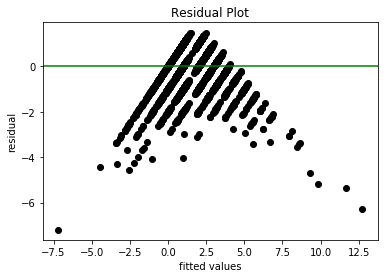

In [130]:
residuals = y_pred - y_test

# Plotting the prediction errors

plt.scatter(y_pred, residuals, color='black')
plt.title('Residual Plot')
plt.ylabel('residual')
plt.xlabel('fitted values')
plt.axhline(y= residuals.mean(), color='green')
plt.show()

### Model 2 : Predicting the Away Score

In [0]:
# Splitting the dataset into train and test sets
#

mycols = [col for col in fifa_df.columns if col not in ['home_score', 'away_score', 'date','rank_date','tournament', 'city', 'country', 
                                                        'country_full', 'country_abrv', 'home_team',
                                                        'away_team']]

X = fifa_df[mycols]
Y = fifa_df['away_score']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state = 13, test_size = 0.3)

# Normalizing the data

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Feature reduction using PCA  
pca = PCA()
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

# We now apply the number of components we desire to the PCA() function for reduction

pca = PCA(n_components = 14)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

# Fitting the polynomial linear regression

poly_features = PolynomialFeatures(degree = 2)

X_train = poly_features.fit_transform(X_train)
X_test = poly_features.fit_transform(X_test)

# Training the model

regressor = LinearRegression(normalize = True )
regressor.fit(X_train, Y_train)

# Making predictions
#
Y_pred = regressor.predict(X_test)

  

#### Interpretting Coefficients

In [157]:
# Prints y-intercept
print(regressor.intercept_)

# Prints the beta coefficients in order
print(regressor.coef_)

feature_columns =['neutral', 'year', 'month', 'home_rank',
       'total_points', 'previous_points', 'rank_change', 'cur_year_avg',
       'cur_year_avg_weighted', 'last_year_avg', 'last_year_avg_weighted',
       'two_year_ago_avg', 'two_year_ago_weighted', 'three_year_ago_avg',
       'three_year_ago_weighted', 'away_rank', 'goal_difference',
       'match_outcome', 'tournament_type']
# Zip can pair feature names as coefficients together
zip(feature_columns, regressor.coef_)

-205360282.99776837
[-6.22586869e+01 -3.92070529e+06  2.14687499e+06  3.59770466e+07
  9.54955106e+07 -1.76824376e+08  9.11222654e+07 -1.19423305e+08
  7.20642300e+06  4.68815688e+06 -1.94636743e+07 -9.29392653e+06
  3.82244395e+06  7.39705842e+05 -1.83098059e+06  4.86982232e+04
 -5.33317355e+04 -8.93726067e+05 -2.37225775e+06  4.39259387e+06
 -2.26361950e+06  2.96666155e+06 -1.79018819e+05 -1.16461177e+05
  4.83508081e+05  2.30875664e+05 -9.49554520e+04 -1.83754475e+04
  4.54844350e+04  1.46018550e+04  4.89381559e+05  1.29898611e+06
 -2.40526952e+06  1.23949873e+06 -1.62446616e+06  9.80258556e+04
  6.37708298e+04 -2.64756116e+05 -1.26421423e+05  5.19950848e+04
  1.00619272e+04 -2.49060058e+04  4.10049024e+06  2.17682336e+07
 -4.03071760e+07  2.07713510e+07 -2.72225824e+07  1.64270643e+06
  1.06866688e+06 -4.43675066e+06 -2.11855365e+06  8.71327239e+05
  1.68616221e+05 -4.17372520e+05  2.88902058e+07 -1.06989168e+08
  5.51343406e+07 -7.22581372e+07  4.36031069e+06  2.83661173e+06
 -1.1

#### Evaluating the results

In [158]:
# We will use the rmse score to evaluate 

print('The rmse score is : ', np.sqrt(mean_squared_error(Y_test, Y_pred)))

The rmse score is :  0.6900236332326315


#### Checking for Heteroscedasticity

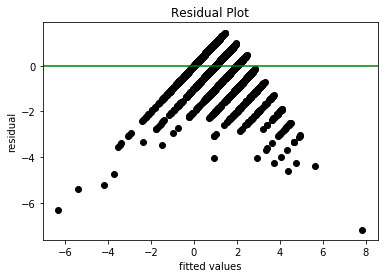

In [129]:
residuals = Y_pred - Y_test

# Plotting the prediction errors

plt.scatter(Y_pred, residuals, color='black')
plt.title('Residual Plot')
plt.ylabel('residual')
plt.xlabel('fitted values')
plt.axhline(y= residuals.mean(), color='green')
plt.show()

### Approach 2 

Predicting whether a match played between two teams ends in a win, loss or a draw

#### Splitting the data into test and training sets

In [138]:
fifa_df.columns

Index(['home_score', 'away_score', 'neutral', 'year', 'month', 'home_rank',
       'total_points', 'previous_points', 'rank_change', 'cur_year_avg',
       'cur_year_avg_weighted', 'last_year_avg', 'last_year_avg_weighted',
       'two_year_ago_avg', 'two_year_ago_weighted', 'three_year_ago_avg',
       'three_year_ago_weighted', 'away_rank', 'goal_difference',
       'match_outcome', 'tournament_type'],
      dtype='object')

In [0]:
# Creating the train and test sets of our dataset

S = fifa_df.drop(['match_outcome', 'home_score', 'away_score','goal_difference'], axis = 1)
t = fifa_df.match_outcome

S_train, S_test, t_train, t_test = train_test_split(S, t, random_state = 3, test_size = 0.3)



#### Modeling the Logistic Regression

In [151]:
#  Applying and training the model

logreg = LogisticRegression()
logreg.fit(S_train, t_train)

# Predicting the results

t_pred = logreg.predict(S_test)

# Evaluating the performance of the model
#
print('The accuracy of the model is',  accuracy_score(t_test, t_pred))
confusion_matrix(t_test, t_pred)


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


The accuracy of the model is 0.5863564668769716


array([[   0,  388,  803],
       [   0,  854,  590],
       [   0,  317, 2120]])

#### Testing for Heteroscedasticity

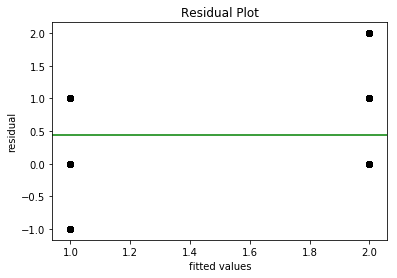

In [152]:
residuals = t_pred - t_test

# Plotting the prediction errors

plt.scatter(t_pred, residuals, color='black')
plt.title('Residual Plot')
plt.ylabel('residual')
plt.xlabel('fitted values')
plt.axhline(y= residuals.mean(), color='green')
plt.show()

## Challenging the solution

> - Fit other models to see if I can get better predictions
> - Learn the art of hyperparameter tuning and apply to my models
> - Gauge the features to be used based on the importance of each feature.


## Summary of Findings

> - Target variables are not normally distributed
> - Presence of outliers in both dependent and independent variables


## Conclusion

> The models used cannot accurately predict the goals scored by either team as the accuracy registered is too low thus unreliable.